# Selecting Neighborhoods When Moving to Austin, TX

This Jupyter Notebook is part of the Capstone Project for the IBM Applied Data Sciecne Professional Certificate.

The direct GitHub link for this file is https://github.com/blackard/Coursera_Capstone/blob/master/Selecting%20Neighborhoods%20When%20Moving%20to%20Austin%2C%20TX.ipynb, and the Jupyter Notbook Viewer link to pull the file from GitHub is https://nbviewer.jupyter.org/github/blackard/Coursera_Capstone/blob/master/Selecting%20Neighborhoods%20When%20Moving%20to%20Austin%2C%20TX.ipynb.  Please use the Jupyter Notebook Viewer link to view the Folium maps included at the document.

This is the final part of a two week Capstone Project for the IBM Applied Data Science Professional Certificate.  The Notebook provides the code and analysis required to support a final Report and Presentation.  The Report is to include:
- Introduction discussing the business problem and who would be interested in this project.
- A section describing the data used to solve the problem and the source of the data.
- Methodology section which represents the main component of the report, discussing and desbribing any exploratory data analysis done, any inferential statistical testing performed, if any, and what machine learnings were used and why.
- Results section discussing the results.
- Discussion section covering any observations noted and any recommendations made based on the results.
- A final section concluding the report.

I am presenting this in a somewhat mixed order, and content will be extracted as necessary to produce the final report.

## Background

Austin, TX is an interesting town.  I say town, but the Austin Greater Metropolitan area has a population in excess of 2.2 million af of 2019 according census data found on [Wikipedia - Greater Austin](https://en.wikipedia.org/wiki/Greater_Austin).  Austin itself is the 11th largest US city, and the 2nd largest US State Capital according to [Wikipedia - List of US cities by population](https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population).

Austin bill's itself as The Live Music Capital of the world (see [Austin Relocation Guide](https://austinrelocationguide.com/live-music-capital-of-the-world/)), hosts University of Texas at Austin, is one of the very few State Capitols with a large economy unrelated to government business, and ranked number 1 in the [Best State Capitals to Live in](https://wallethub.com/edu/best-state-capitals/19030) in 2020.  Further, Austin is the heart of the Silicon Hills [Wikipedia - Silocon Hills](https://en.wikipedia.org/wiki/Silicon_Hills), hosting an incredible number of variety of high-tech companies, providing a wealth of employment opportunities for people in a variety of areas.  Austin boasts a wide variety of oppotrunities for outdoor activity, and also the home of the first purpose-built Formula 1 venue in the United States, [Circuit of the Americas](http://circuitoftheamericas.com/), which hosts a number of events and activiteis throughout the year, not all directly associated with motorsports.

Considering Greater Austin has experienced growth of over 100 people per day for several consecutive years, and is one of the fastest growing cities with over 1 million population (see [Austin remains fastest-growing big city in country](https://www.bizjournals.com/austin/news/2020/03/26/austin-remains-fastest-growing-big-city-in-country.html), it makes an interesting city to investigate.

Unfortunately, there isn't an aggregated collection of datasets covering all the Counties and Municipalities that make up Greater Austin.  Further, I was unable to find disconnected datasets that could create a unified picture of the area.  For example, while West Lake Hills is a very nice area, with well rated schools and a diverse community, it is not part of the City of Austin.  Netiher are several areas that have chosed not to be incorporated with the city.

Therefore, the investigation will be limited to the Incorporated areas of the City of Austin itself.  Unincorporated areas, and interesting, vibrant and growing areas outside the city limits are excluded from analysis.

### Austin Geographic Breakdowns

Austin privides access to a trove of datasets through the [Austin Open Data Portal](https://data.austintexas.gov/), as well as datatests from Austin's [GIS Data and Maps Department](http://www.austintexas.gov/department/gis-data), and [Demographic Data](https://www.austintexas.gov/page/demographic-data) aggregated by the city.  Digging into the data, there are three primary geographic breakdowns for the city.  First is what Austin calls Neighborhood Reporing Areas.  Each Neighborhood Reporting Area is compirised of several smaller elements such as Subdibisions or individual Neighborhoods, but The City of Austin uses Neiborhood Reporting Areas as the primary mechanism for planning and reporting. There are also breakdowns by Census Tract or Census Block Group, and breakdowns by Zip Code.

### Difficulties Relating Neighborhood, Zip Code, Counties, Census Tracts or Other Data

The US Department of Housing and Urban Development (HUD) has published what it calls crosswalk files that can map between Zip Codes and Census Tracts or Cencus Block Groups.  While there is a one-to-many relationship between Counties and Census Tracts, the relationships between Zip Codes and Cencus Tracts, Neighborhoods to Zip Code, or Neighborhoods to Cencus Tracts are many-to-many - meaning one Neighborhood may be related to more than one Zip Codes, and one Zip Code may be related to more than one Neighborhood, for example.

Other data that would be valuable in terms of choosing a neighborhood to live in are also problematic to work with.  For example, School Districts are entirely independent administrative entities in Texas, and are not directly bound to any city.  Their boundaries, or designated school assignments do not follow other existing boundary data, and therefore cannot be agregated properly with other candidate breakdowns.

For this reason, it is best to pick the breakdown of the reigon, and then use datasets that follow that same breakdown.

The choice here, then, when reviewing available datasets and possible exploration options, is to use Neighborhood Reporting Areas, and to keep the analysis and reporting at that level.

### Selected Candidate Datasources and Datasets

There is a GeoJSON file on the [Austin Open Data Portal](https://data.austintexas.gov/) providing boundary data for each of Austin's 103 Neighborhood Reporting Areas.  The latest version of that file is from [January 4, 2021](https://data.austintexas.gov/resource/a7ap-j2yt.json).

The City of Austin also maintains a [Demographic Data](https://www.austintexas.gov/page/demographic-data) site that provides two interesting sets of demographic data by Neighborhood Report Area as Excel files - [Table I: population, race and ethnicity, housing and density](https://www.austintexas.gov/sites/default/files/files/Planning/Demographics/Neighborhood_Reporting_Areas_Table_I.xlsx) and [Table II: household characteristics and age structure](https://www.austintexas.gov/sites/default/files/files/Planning/Demographics/Neighborhood_Reporting_Areas_Table_II.xlsx).

Finally, nearby venue data for each neighborhood collected using the Foursquare API will be processed to extract frequencies for different types of venues.

Combining demographic and venue frequency data should result in some interesting analysis opportunities.

### Possible Investigation Paths

Given the growth for The City of Austin over the last decade, it would be interesting to use Data Science methods to analize Neighborhoods that people may want to live if the choose to move to Austin.

There is some data that is not redily available for Neighborhood analysis.  For example, as previously mentioned Texas Independent Schood Districts assign the schools a child would attend based on frequently changing zone maps that are not related to any of the breakdowns readily available, so school quality will not be used in this analysis.  The crime report data available from the [Austin Open Data Portal](https://data.austintexas.gov/) provides Zip Code and Address, but not Neighborhood, and no readily accessible freely available mehtod for identifying the Neighborhood has been identified.  These data, therefore, are not available for investigation at this time.

## Problem Proposal

The question, then, is: What might be good neighborhoods for a new Austinite to choose to live in?

Clustering to group Neighborhoods into related sets will be attempted.  First, an investigative dataset will be built by combigning sets of demograhic data with frequencies of the nearby venue types reported by Foursqure within and given distance the neighborhood center.  Next, this data will be used to perform K-Means Clustering, and the the resulting clusters  will be analyzeed to try and extract key or defining characteristics of each cluster.  This information will be presented for use when seeking to determine where one might choose to live if moving to Austin, TX.

### Using the Datasets

Neighborhood Boundary Data from the [January 4, 2021](https://data.austintexas.gov/resource/a7ap-j2yt.json) GeoJSON file will be used to produce a color-coded Choropleth map in Folium, rather than color-coding map markers.  By color coding the bounding areas of each neighborhood, it is hoped the content will be more meaningful.

Housing and Population Density data from the [Table I: population, race and ethnicity, housing and density](https://www.austintexas.gov/sites/default/files/files/Planning/Demographics/Neighborhood_Reporting_Areas_Table_I.xlsx) will be used to provide information about population density of each neighborhood.  The race and enthnicity data in this table will be excluded from the analysis.

Counts of Families with Children, and a modified Age breakdown will be extracted from the [Table II: household characteristics and age structure](https://www.austintexas.gov/sites/default/files/files/Planning/Demographics/Neighborhood_Reporting_Areas_Table_II.xlsx).  Existing age groupings will be aggregated to fewer groups, including Young Children, Schoold Age Children, Late Teens to Early 20s, Mid 20s to Late 50s, and Seniors.

Frequency of Venue Types data collected from the Foursqueare API will be agregated with the Housing, Population, Family and Age data above to build a Dataset suitable for K-Means or similar clustering.  The resulting Clusters will be color coded on a Folium Choropleth map, and a review of the data for each cluster will attempt to extract key charachteristics of the group.

## An Initial Map of Neighborhoods

First, installations and imports of libraries used, and defininition some functions is performed.

In [1]:
# Imports for the Project as a whole

# NOTE: Outputs for this are hidden since they don't add to the value of the review

# Install and Import folium - we'll use this for creating maps, displaying boundaries and specific points of interest
!pip install folium
import folium

# Install and Import geocoder - we'll use this to get longitude and latitude data from ArcGIS
!pip install geocoder
import geocoder

# Import requests - we'll use this to process HTML requests
import requests

# Import pandas
import pandas as pd

# Imporot numpy
import numpy as np

# Import pandas json_normalize
from pandas.io.json import json_normalize

# Install and Import geopandas
!pip install geopandas
import geopandas

# Install and Import geojson
!pip install geojson
import geojson

# Import math - 'cause every now and then, you gotta do some math
import math

# Import sklearn metrics
from sklearn import metrics

# import sklearn k-means from clustering stage
from sklearn.cluster import KMeans

# Import pyplot from matplotlib
import matplotlib.pyplot as plt

# Import matplotlib colormap
import matplotlib.cm as cm

# Import matplotlib colors
import matplotlib.colors as colors

     |████████████████████████████████| 94 kB 5.6 MB/s  eta 0:00:01
     |████████████████████████████████| 98 kB 7.5 MB/s  eta 0:00:01
     |████████████████████████████████| 962 kB 17.6 MB/s eta 0:00:01
     |████████████████████████████████| 6.4 MB 40.8 MB/s eta 0:00:01
     |████████████████████████████████| 14.8 MB 19.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 38.3 MB/s eta 0:00:01


In [2]:
# The code was removed by Watson Studio for sharing.

NOTE: Several functions from one of the pracitce exercieses are reused.  Credit to [Alex Aklson](https://www.linkedin.com/in/aklson/) and [Polong Lyn](https://www.linkedin.com/in/polonglin) for their work on the [DS0701EN-3-3-2-Neighborhoods-New-York](https://labs.cognitiveclass.ai/tools/jupyterlab/lab/tree/labs/DS0701EN/DS0701EN-3-3-2-Neighborhoods-New-York-py-v1.0.ipynb) practice lab.

In [10]:
# Functions for the Project as a whole

# Foursquare API version
FOURSQUARE_VERSION = '20180605'
# A default Foursquare API limit value
FOURSQUARE_LIMIT = 300
# A default Foursquare API search radius
FOURSQUARE_RADIUS = 1000

# Lookup the Latitude and Longitude of a named Location using the ArgGIS API
def get_location_coordinates(location):
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        # NOTE: Google failed to return results, but ArcGIS was very good at finding the coordinates
        g = geocoder.arcgis(location)
        lat_lng_coords = g.latlng
      
    return(lat_lng_coords[0], lat_lng_coords[1])

# Extrat Category Types from Foursquare result
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# Collect venues for multiple locations
def getNearbyVenues(names, latitudes, longitudes, radii):
    
    venues_list=[]
    for name, lat, lng, rad in zip(names, latitudes, longitudes, radii):
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            FOURSQUARE_CLIENT_ID, 
            FOURSQUARE_CLIENT_SECRET, 
            FOURSQUARE_VERSION, 
            lat, 
            lng, 
            rad, 
            FOURSQUARE_LIMIT)

        try:
          # make the GET request
          results = requests.get(url).json()["response"]['groups'][0]['items']
        
          # return only relevant information for each nearby venue
          venues_list.append([(
              name, 
              lat, 
              lng, 
              v['venue']['name'], 
              v['venue']['location']['lat'], 
              v['venue']['location']['lng'],  
              v['venue']['categories'][0]['name']) for v in results])
        except:
            print("Error processing Foursquare URI")
            print(url)

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

# Get to top Venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### Determine the Latitude and Longitude of Austin, TX and of each Neighborhood

First the ArcGIS API is used to find the Latitude and Longitude of the City of Austin as a whole.  

In [4]:
# Find the Latitude and Longitude of Austin, TX
city_state = "Austin, TX"
latitude, longitude = get_location_coordinates(city_state)
print("Austin, TX Latitude: {} Longitude: {}".format(latitude, longitude))

Austin, TX Latitude: 30.26759000000004 Longitude: -97.74298999999996


While the ArgGIS API might be used to find the Latitude and Longitude for each Neighborhood Reporting Area (referred to simply as Neighborhood from this point forward), we already have boundary data in the GeoJSON file.  The GeoPandas library, and in particular the GeoSeries tooling, is used to compute the geographic centriod of the bounding areas for each neighborhood.

Note that the original GeoJSON had neighborhood names in all-caps. The following code was used to read the GeoJSON file, convert most names to more readable formant, then a new GeoJSON file was stored locally:

```python
import requests
import json

response = requests.get('https://data.austintexas.gov/resource/a7ap-j2yt.geojson')
data = response.json()

for item in data['features']:
    name = item['properties']['neighname']
    if (name != 'MLK' and name != 'MLK-183' and name != 'LBJ' and name != 'UT'):
        if (name == 'MCNEIL'):
            item['properties']['neighname'] = 'McNeil'
        else:
            item['properties']['neighname'] = name.title()

with open('C:\Storage\Development\Coursera\Experiment\Austin_TX_Neighborhood_Reporting_Areas.geojson', 'w') as f:
    json.dump(data, f, indent=2)
```

The resulting file was uploaded to GitHub at [Austin_TX_Neighborhood_Reporting_Areas.geojson](https://github.com/blackard/Coursera_Capstone/blob/master/Austin_TX_Neighborhood_Reporting_Areas.geojson), and that file is used in the analysis.

In addition to computing the cendriods, the sqmiles field for each negiborhood is used to compute the Foursquare radius in meters.  This allows us to reasonably include venue data for entier neighborhoods for those with larger areas, while also not being over-inclusive of venues for smaller neighborhoods, thereby skewing their characteristics.

In [5]:
# The Austin Neighorhood Reporting Area GeoJSON
# Note: The original dataset can be found at https://data.austintexas.gov/resource/a7ap-j2yt.geojson
austin_nra_geojson = 'https://github.com/blackard/Coursera_Capstone/raw/master/Austin_TX_Neighborhood_Reporting_Areas.geojson'

# First read the GeoJSON file so we can process its contents
df_austin_nra_geojson = geopandas.read_file(austin_nra_geojson)

# Next create and fill in the dataframe with our neighborhood centroid and radius data
df = pd.DataFrame(columns=['Neighborhood', 'Latitude', 'Longitude', 'Radius'])
for index, row in df_austin_nra_geojson.iterrows():
    latlong = geopandas.GeoSeries(row['geometry']).centroid[0]
    df.loc[index] = [row['neighname'], latlong.y,latlong.x,math.sqrt(float(row['sqmiles']))*1609.34]

neighborhood_count = df.shape[0]
print("Austin, TX Neighborhood dataframe contains {} rows".format(neighborhood_count))
df.head()

Austin, TX Neighborhood dataframe contains 103 rows


Neighborhood   Latitude  Longitude       Radius
0    Anderson Mill  30.441196 -97.809771  4738.429863
1     Windsor Park  30.311575 -97.692326  2484.371433
2           Dawson  30.232695 -97.761797  1132.882905
3  West University  30.291838 -97.745308  1382.948332
4              MLK  30.283831 -97.692304  2000.560832

### Create the Map

Now map assembly begins.  First, a Folium map is created, centered on The City of Austin.  Next Circle elements are placed on the map showing the radius that will be used in the Foursquare API venue requests for each neighborhood.  Then neighborhood boundary data is added using the GeoJSON file, including a tooltip (aka hover-text) for each neighborhood so that, as the mouse moves over the neighborhood boundary, the neighborhood name is displayed.  Finally, circular Marker elements are placed for each Neighborhood based on its computed Latitude and Longituge, including a popup for each Marker that will display the eighborhood name for the marker.

Note that, the order of placement of this content is significant as, for example, if the Circle elements were added last, they would prevent functionality of the tooltip or popup values.  Therefore, while it may have been possible to iterate through the GeoPandas dataframe just once, it was more effective to perform each step independently, in the appropriate order.

In [6]:
# Create the Folium map
map_austin_neighborhood = folium.Map(location=[latitude, longitude], zoom_start=11, control_scale = True)

# Add circles to map showing the Foursquare API radius for each neighborhood
for index, row in df.iterrows():
    folium.Circle(
        [row['Latitude'], row['Longitude']],
        radius=row['Radius'],
        color='grey',
        fill=True,
        fill_color='grey',
        fill_opacity=0.15,
        parse_html=False).add_to(map_austin_neighborhood)

# Add neighborhood boundaries to the map using the GeoJSON file
folium.GeoJson(austin_nra_geojson, 
               name="Neighborhood",
               tooltip=folium.GeoJsonTooltip(
                   fields=['neighname'],
                   aliases=['Neighborhood'],
                   localize=True
               )).add_to(map_austin_neighborhood)

# add markers to map
for index, row in df.iterrows():
    label = row['Neighborhood']
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [row['Latitude'], row['Longitude']],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.5,
        parse_html=False).add_to(map_austin_neighborhood)

folium.LayerControl().add_to(map_austin_neighborhood)

map_austin_neighborhood

### Reviewing the Map

As can be seen, the results are imperfect, but likely sufficient for our purposes.  Take for example Jester, West Oak Hill and Franklin Park. For those three neighborhoods, the Latitude and Longitude computed by GeoPandas seem reasonably located within their respective neighborhood boundary, and the radius does a good job covering the neighborhood boundary without too much excess.  However, others such as Del Valle East, Onion Creek, or Mansfield -- River Place, the significantly irregular boundaries resulted in radii that are less precice, but the Longitude and Latitude seem reasonable.

Looking at the content of the GeoJSON, it can be seen that the boudary data is provided as MultiPolygons, and in cases such as Del Valle East and Onion Creek, the boundaries include multiple separate polygons that aren't connected.  An extract of the GeoJSON file demonstrates this.  In the GeoJSON extract below, it can be seen that Anderson Mill's geometry entry is a MultiPolygon, and that Del Valle East's geometry is a MultiPolygon with three sets of coordinates.

```json
{
	"type": "FeatureCollection",
	"features": [
		{
			"type": "Feature",
			"properties": {
				... content removed...
				"neighname": "ANDERSON MILL",
								... content removed...

			},
			"geometry": {
				"type": "MultiPolygon",
				"coordinates": [
					... content removed...
				]
			}
		},
		... content removed...
		{
			"type": "Feature",
			"properties": {
				... content removed...
				"neighname": "DEL VALLE EAST",
				... content removed...
			},
			"geometry": {
				"type": "MultiPolygon",
				"coordinates": [
					[
						... content removed...
					],
					[
						... content removed...
					],
					[
						... content removed...
					]
				]
			}
		},
    ]
	... content removed...
}
```

A map of the Del Valle East neighborhood borders was created by extracting its GeoJSON feature from the original file, saved it to a new local file, and uploaded to GitHub at [Austin_TX_Neighborhoods_Del_Valle_East.geojson](https://github.com/blackard/Coursera_Capstone/blob/master/Austin_TX_Neighborhoods_Del_Valle_East.geojson)

In [7]:
# The Austin Neighorhood Reporting Area GeoJSON
del_valle_east_geojson = 'https://github.com/blackard/Coursera_Capstone/raw/master/Austin_TX_Neighborhoods_Del_Valle_East.geojson'

# Extract just the Del Valle East row from the GeoPandas dataframe
row_del_valle_east = None
for index, row in df.iterrows():
    if(row['Neighborhood'] == 'Del Valle East'):
        row_del_valle_east = row
        break

map_del_valle_east = folium.Map(location=[row_del_valle_east['Latitude'], row_del_valle_east['Longitude']], zoom_start=13, control_scale = True)

# Add circle to map showing the Foursquare API radius for the neighborhood
folium.Circle(
    [row_del_valle_east['Latitude'], row_del_valle_east['Longitude']],
    radius=row_del_valle_east['Radius'],
    color='grey',
    fill=True,
    fill_color='grey',
    fill_opacity=0.15,
    parse_html=False).add_to(map_del_valle_east)

# Add Neighborhood Boundaries to the map using the GeoJSON file
folium.GeoJson(del_valle_east_geojson, 
    name="Neighborhood",
    tooltip=folium.GeoJsonTooltip(
        fields=['neighname'],
        aliases=['Neighborhood'],
        localize=True)).add_to(map_del_valle_east)

# add marker to map
label_del_valle_east = row_del_valle_east['Neighborhood']
label_del_valle_east = folium.Popup(label_del_valle_east, parse_html=True)
folium.CircleMarker(
    [row_del_valle_east['Latitude'], row_del_valle_east['Longitude']],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.5,
    parse_html=False).add_to(map_del_valle_east)

folium.LayerControl().add_to(map_del_valle_east)

map_del_valle_east

It can be seen that the centroid is reasonbly placed in the overall center, even though it falls outside any given boundary, and that the radius in this case is under-sized, but reasonable for the purposes of the exercise.

## Collecting and Preparing Data for Analysis

Now that the neighborhood names, locations and search radii have been collected, the next step is to collect the data that will be used for the analysis, starting with the Foursquare venue data.

### Collecting and Reviewing Venue Data

The previously defined getNearbyVenues procedure is used to collect the data from the Fourquare API.

In [11]:
# Collect Austin Venues
austin_venues = getNearbyVenues(names=df['Neighborhood'],
    latitudes=df['Latitude'],
    longitudes=df['Longitude'],
    radii=df['Radius'])

venue_count = austin_venues.shape[0]
print("Austin Venues dataframe contains {} rows, averaging {:.1f} venues per neighborhood".format(venue_count,venue_count/neighborhood_count))
austin_venues.head()

Austin Venues dataframe contains 8082 rows, averaging 78.5 venues per neighborhood


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Anderson Mill              30.441196              -97.809771   
1  Anderson Mill              30.441196              -97.809771   
2  Anderson Mill              30.441196              -97.809771   
3  Anderson Mill              30.441196              -97.809771   
4  Anderson Mill              30.441196              -97.809771   

              Venue  Venue Latitude  Venue Longitude    Venue Category  
0  Half Price Books       30.448960       -97.791994         Bookstore  
1      Osaka Mansun       30.448589       -97.792356  Sushi Restaurant  
2    Torchy's Tacos       30.452968       -97.827602        Taco Place  
3       H-E-B plus!       30.453602       -97.825379     Grocery Store  
4  Amy's Ice Creams       30.443817       -97.784338    Ice Cream Shop

#### Transforming Venue Data for Clustering

The raw data is first transformed used in cluster analysis, collecting the frequency of each Venue Category in each Neighbourhood. This is a two stage process, first transposing Venue Category items into Column headers and marking each Neighbourhood-Venue Category intersection for each row of the raw content.

In [12]:
austin_onehot = pd.get_dummies(austin_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
austin_onehot['Neighborhood'] = austin_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [austin_onehot.columns[-1]] + list(austin_onehot.columns[:-1])
austin_onehot = austin_onehot[fixed_columns]

print("The resulting dataframe has {} rows and {} columns".format(austin_onehot.shape[0], austin_onehot.shape[1]))
austin_onehot.head()

The resulting dataframe has 8082 rows and 357 columns


Neighborhood  ATM  Adult Boutique  Advertising Agency  African Restaurant  \
0  Anderson Mill    0               0                   0                   0   
1  Anderson Mill    0               0                   0                   0   
2  Anderson Mill    0               0                   0                   0   
3  Anderson Mill    0               0                   0                   0   
4  Anderson Mill    0               0                   0                   0   

   Airport  Airport Lounge  Airport Service  Airport Terminal  \
0        0               0                0                 0   
1        0               0                0                 0   
2        0               0                0                 0   
3        0               0                0                 0   
4        0               0                0                 0   

   American Restaurant  ...  Warehouse Store  Waterfall  Weight Loss Center  \
0                    0  ...                0          0                   0   
1                    0  ...                0          0                   0   
2                    0  ...                0          0                   0   
3                    0  ...                0          0                   0   
4                    0  ...                0          0                   0   

   Wine Bar  Wine Shop  Winery  Wings Joint  Women's Store  Yoga Studio  Zoo  
0         0          0       0            0              0            0    0  
1         0          0       0            0              0            0    0  
2         0          0       0            0              0            0    0  
3         0          0       0            0              0            0    0  
4         0          0       0            0              0            0    0  

[5 rows x 357 columns]

From this the frequency values can be computed.

In [13]:
austin_grouped = austin_onehot.groupby('Neighborhood').mean().reset_index()
print("The resulting dataframe has {} rows and {} columns".format(austin_grouped.shape[0], austin_grouped.shape[1]))
austin_grouped.head()

The resulting dataframe has 103 rows and 357 columns


Neighborhood  ATM  Adult Boutique  Advertising Agency  \
0              Allandale  0.0             0.0                 0.0   
1          Anderson Mill  0.0             0.0                 0.0   
2  Avery Ranch--Lakeline  0.0             0.0                 0.0   
3      Barton Creek Mall  0.0             0.0                 0.0   
4           Barton Hills  0.0             0.0                 0.0   

   African Restaurant  Airport  Airport Lounge  Airport Service  \
0                 0.0      0.0             0.0              0.0   
1                 0.0      0.0             0.0              0.0   
2                 0.0      0.0             0.0              0.0   
3                 0.0      0.0             0.0              0.0   
4                 0.0      0.0             0.0              0.0   

   Airport Terminal  American Restaurant  ...  Warehouse Store  Waterfall  \
0               0.0             0.010000  ...             0.00        0.0   
1               0.0             0.020000  ...             0.01        0.0   
2               0.0             0.030000  ...             0.01        0.0   
3               0.0             0.014706  ...             0.00        0.0   
4               0.0             0.030000  ...             0.00        0.0   

   Weight Loss Center  Wine Bar  Wine Shop  Winery  Wings Joint  \
0                0.01      0.00       0.00     0.0         0.00   
1                0.00      0.00       0.01     0.0         0.01   
2                0.00      0.01       0.01     0.0         0.01   
3                0.00      0.00       0.00     0.0         0.00   
4                0.00      0.01       0.00     0.0         0.01   

   Women's Store  Yoga Studio  Zoo  
0       0.000000     0.000000  0.0  
1       0.000000     0.000000  0.0  
2       0.000000     0.000000  0.0  
3       0.014706     0.014706  0.0  
4       0.010000     0.010000  0.0  

[5 rows x 357 columns]

This content is difficult to make much sense of, a dataframe showing the top 10 venues for each Neighbourhood can be constructed.  Again, the code here is attributed to [Alex Aklson](https://www.linkedin.com/in/aklson/) and [Polong Lyn](https://www.linkedin.com/in/polonglin) for their work on the [DS0701EN-3-3-2-Neighborhoods-New-York](https://labs.cognitiveclass.ai/tools/jupyterlab/lab/tree/labs/DS0701EN/DS0701EN-3-3-2-Neighborhoods-New-York-py-v1.0.ipynb) practice lab.

In [14]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = austin_grouped['Neighborhood']

for ind in np.arange(austin_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(austin_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0              Allandale    Mexican Restaurant           Coffee Shop   
1          Anderson Mill                  Park          Burger Joint   
2  Avery Ranch--Lakeline                   Gym   American Restaurant   
3      Barton Creek Mall                 Trail           Coffee Shop   
4           Barton Hills           Coffee Shop                 Trail   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0           Pizza Place          Burger Joint                   Gym   
1      Sushi Restaurant    Italian Restaurant         Movie Theater   
2        Sandwich Place                   Spa           Coffee Shop   
3                Bakery           Pizza Place                  Park   
4            Taco Place        Ice Cream Shop   American Restaurant   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0            Taco Place     Korean Restaurant                Bakery   
1         Grocery Store           Pizza Place                Bakery   
2           Pizza Place                  Park              Pharmacy   
3          Intersection        Sandwich Place        Cosmetics Shop   
4         Grocery Store        Cosmetics Shop            Playground   

  9th Most Common Venue 10th Most Common Venue  
0     Indian Restaurant       Asian Restaurant  
1    Mexican Restaurant           Liquor Store  
2                Bakery          Movie Theater  
3     Electronics Store                   Lake  
4             BBQ Joint                    Spa

#### Initial Review with Clusters

The first step is to select a value for k.  As the k-means inertia takes its time approaching zero, and the bend in the elbow id dificult to discern exactly, additional information about the number of single-member clusters and maximum cluster size is collected for review.

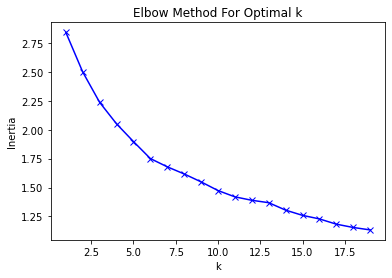

K   Inertia  Single-Member Clusters  Multi-Member Clusters  \
1    1.0  2.843664                     0.0                    1.0   
2    2.0  2.500249                     0.0                    2.0   
3    3.0  2.237500                     2.0                    1.0   
4    4.0  2.051348                     2.0                    2.0   
5    5.0  1.898160                     3.0                    2.0   
6    6.0  1.751006                     3.0                    3.0   
7    7.0  1.679436                     3.0                    4.0   
8    8.0  1.617748                     3.0                    5.0   
9    9.0  1.549156                     3.0                    6.0   
10  10.0  1.474219                     4.0                    6.0   
11  11.0  1.419623                     4.0                    7.0   
12  12.0  1.389827                     5.0                    7.0   
13  13.0  1.369040                     5.0                    8.0   
14  14.0  1.304652                     6.0                    8.0   
15  15.0  1.259437                     7.0                    8.0   
16  16.0  1.228666                     7.0                    9.0   
17  17.0  1.183153                     7.0                   10.0   
18  18.0  1.154597                     7.0                   11.0   
19  19.0  1.133498                     7.0                   12.0   

    Max Cluster Size  
1              103.0  
2              101.0  
3              101.0  
4               71.0  
5               91.0  
6               77.0  
7               69.0  
8               47.0  
9               32.0  
10              34.0  
11              33.0  
12              36.0  
13              28.0  
14              31.0  
15              31.0  
16              30.0  
17              27.0  
18              25.0  
19              19.0

In [15]:
# Find the best K based on inertia
# Remove the neighborhood from the grouped data to perofrm clustering
austin_grouped_clustering = austin_grouped.drop('Neighborhood', 1)

# Initialize the score data
Ks = range(1,20)
evaluation = pd.DataFrame(columns=['K', 'Inertia', 'Single-Member Clusters', 'Multi-Member Clusters', 'Max Cluster Size'])

# For classifiers
for n in Ks:
    # run k-means clustering
    kmeans = KMeans(n_clusters=n, random_state=3).fit(austin_grouped_clustering)
    # record metrics
    smc = None
    mmc = None
    try:
        # determine the number of single-member clusters
        cluster_counts = np.bincount(kmeans.labels_)
        mcc = max(cluster_counts)
        unique, counts = np.unique(cluster_counts,return_counts=True)
        count_counts = dict(zip(unique,counts))
        smc = count_counts[1]
        # calculate multi-member clusters
        mmc = n - count_counts[1]
    except:
        smc = 0
        mmc = n
    evaluation.loc[n] = [n, kmeans.inertia_, smc, mmc, mcc]

plt.plot(evaluation['K'], evaluation['Inertia'], 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

evaluation

From the graph, the "elbow seems to be somewhere between k = 5 and 10.  Given k = 5 has just one single-member cluster, k = 5 seems to be a better candidate. for analysis.

In [16]:
# set number of clusters
kclusters = 5
random = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=random).fit(austin_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [17]:
# add clustering labels
clustered_neighborhoods = neighborhoods_venues_sorted.copy()
clustered_neighborhoods.insert(0, 'Cluster Labels', kmeans.labels_)

austin_merged = df

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
austin_merged = austin_merged.join(clustered_neighborhoods.set_index('Neighborhood'), on='Neighborhood')

austin_merged.head()

Neighborhood   Latitude  Longitude       Radius  Cluster Labels  \
0    Anderson Mill  30.441196 -97.809771  4738.429863               2   
1     Windsor Park  30.311575 -97.692326  2484.371433               2   
2           Dawson  30.232695 -97.761797  1132.882905               2   
3  West University  30.291838 -97.745308  1382.948332               2   
4              MLK  30.283831 -97.692304  2000.560832               2   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0                  Park          Burger Joint      Sushi Restaurant   
1    Mexican Restaurant            Taco Place                  Park   
2            Food Truck    Mexican Restaurant           Video Store   
3            Food Truck        Sandwich Place          Burger Joint   
4     Convenience Store           Coffee Shop                   Bar   

  4th Most Common Venue 5th Most Common Venue   6th Most Common Venue  \
0    Italian Restaurant         Movie Theater           Grocery Store   
1           Pizza Place  Fast Food Restaurant          Ice Cream Shop   
2            Taco Place                  Café  Thrift / Vintage Store   
3            Taco Place                   Bar    Fast Food Restaurant   
4                  Park               Theater             Gas Station   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0           Pizza Place                Bakery    Mexican Restaurant   
1         Grocery Store           Coffee Shop                  Café   
2  Fast Food Restaurant           Coffee Shop                   Bar   
3           Coffee Shop        Student Center                 Hotel   
4        Discount Store    Seafood Restaurant     Outdoor Sculpture   

  10th Most Common Venue  
0           Liquor Store  
1                 Bakery  
2          Grocery Store  
3                 Museum  
4             Playground

In [18]:
cluster_member_count = np.bincount(austin_merged['Cluster Labels'])
cluster_member_count

array([ 1,  9, 91,  1,  1])

Mapping the clusters is done using both the GeoJSON boundary data, color coding the neighborhoods based on their respective cluster label, as well as providing a pop-up for each neighborhood with its cluster label and the number of members in the cluster.

In [19]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# Define a color_set to use for map coloration
color_set = ['blue', 'orange', 'green', 'purple', 'yellow', 'red', 'grey', 'magenta', 'white', 'pink', 'black']

# Define a function to determine the color of a neighborhood based on its Cluster
def neighborhood_style_function(feature):
    return {
        'lineColor': 'black',
        'fillColor': color_set[austin_merged.loc[austin_merged['Neighborhood']==feature['properties']['neighname']]['Cluster Labels'].item()]
    }

# Add neighborhood boundaries to the map using the GeoJSON file
folium.GeoJson(austin_nra_geojson, 
               name='Neighborhood',
               style_function=neighborhood_style_function,
               tooltip=folium.GeoJsonTooltip(
                   fields=['neighname'],
                   aliases=['Neighborhood'],
                   localize=True
               )).add_to(map_clusters)

# add markers to map
for index, row in austin_merged.iterrows():
    label = "Neighborhood: {} Cluster: {} Members: {}".format(row['Neighborhood'],row['Cluster Labels'],cluster_member_count[row['Cluster Labels']])
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [row['Latitude'], row['Longitude']],
        radius=5,
        popup=label,
        color=color_set[row['Cluster Labels']],
        fill=True,
        fill_color=color_set[row['Cluster Labels']],
        fill_opacity=0.5,
        parse_html=False).add_to(map_clusters)

map_clusters

This provides at least some confidence that k-means clustering will provide a useful mechanism for differentiating neighborhoods in Austin, TX.

### Collecting and Reviewing Housing and Population Density Data

The next step is to collect and process Housing and Population Density data, similar to what was done with venue data.

In [20]:
# Note: The original dataset can be found at https://data.austintexas.gov/resource/a7ap-j2yt.geojson
austin_hp = 'https://www.austintexas.gov/sites/default/files/files/Planning/Demographics/Neighborhood_Reporting_Areas_Table_I.xlsx'

# First read the Excel file so we can process its contents, ignoring the top rows which don't contain useful data
df_austin_hp = pd.read_excel(austin_hp,skiprows=16)
# Update column headers to useful values
df_austin_hp.columns = ['Unused 1', 'Neighborhood', 'Total Pop', 'Non-Hisp White', 'African American', 'Hispanic', 'Asian', 'Other Race', 
                        'Unused 2', 'Total Units', 'Ocupied Housing', 'Vacant Housing', 'Pct Owner Occupied',
                        'Unused 3', 'Pop Density', 'Density Rank', 'Acres']
# Drop empty column values
df_austin_hp.drop(columns=['Unused 1', 'Unused 2', 'Unused 3'], inplace=True)
print("Resulting dataframe shape is {}".format(df_austin_hp.shape))
df_austin_hp.head()

Resulting dataframe shape is (103, 14)


Neighborhood  Total Pop  Non-Hisp White  African American  \
0              ALLENDALE       6643        0.831703          0.018967   
1          ANDERSON MILL      28473        0.647455          0.033295   
2  AVERY RANCH--LAKELINE      14785        0.584850          0.039567   
3      BARTON CREEK MALL       5147        0.793472          0.008160   
4           BARTON HILLS       8022        0.783720          0.013837   

   Hispanic     Asian  Other Race  Total Units  Ocupied Housing  \
0  0.109740  0.018967    0.020623         3612             3263   
1  0.131107  0.163277    0.024866        11507            10904   
2  0.140615  0.206628    0.028340         6108             5681   
3  0.092287  0.086652    0.019429         2195             2076   
4  0.135627  0.043381    0.023436         4965             4614   

   Vacant Housing Pct Owner Occupied  Pop Density  Density Rank        Acres  
0             349           0.641128     5.096345            60  1303.483062  
1             603           0.672872     4.989661            62  5706.399565  
2             427           0.605351     3.185472            74  4641.385040  
3             119           0.637283     2.220364            84  2318.088291  
4             351           0.313827     3.936028            70  2038.095147

In [21]:
# Update neighborhood names as with the GeoJSON file
def neighborhood_case(name):
    if (name != 'MLK' and name != 'MLK-183' and name != 'LBJ' and name != 'UT'):
        if (name == 'MCNEIL'):
            name = 'McNeil'
        else:
            name = name.title()
    return name

df_austin_hp['Neighborhood'] = df_austin_hp['Neighborhood'].apply(neighborhood_case)
df_austin_hp.head()

Neighborhood  Total Pop  Non-Hisp White  African American  \
0              Allendale       6643        0.831703          0.018967   
1          Anderson Mill      28473        0.647455          0.033295   
2  Avery Ranch--Lakeline      14785        0.584850          0.039567   
3      Barton Creek Mall       5147        0.793472          0.008160   
4           Barton Hills       8022        0.783720          0.013837   

   Hispanic     Asian  Other Race  Total Units  Ocupied Housing  \
0  0.109740  0.018967    0.020623         3612             3263   
1  0.131107  0.163277    0.024866        11507            10904   
2  0.140615  0.206628    0.028340         6108             5681   
3  0.092287  0.086652    0.019429         2195             2076   
4  0.135627  0.043381    0.023436         4965             4614   

   Vacant Housing Pct Owner Occupied  Pop Density  Density Rank        Acres  
0             349           0.641128     5.096345            60  1303.483062  
1             603           0.672872     4.989661            62  5706.399565  
2             427           0.605351     3.185472            74  4641.385040  
3             119           0.637283     2.220364            84  2318.088291  
4             351           0.313827     3.936028            70  2038.095147

In [22]:
# Drop race and other columns that aren't useful
df_austin_hp.drop(columns=['Non-Hisp White', 'African American', 'Hispanic', 'Asian', 'Other Race', 'Density Rank', 'Acres'], inplace=True)
df_austin_hp.head()

Neighborhood  Total Pop  Total Units  Ocupied Housing  \
0              Allendale       6643         3612             3263   
1          Anderson Mill      28473        11507            10904   
2  Avery Ranch--Lakeline      14785         6108             5681   
3      Barton Creek Mall       5147         2195             2076   
4           Barton Hills       8022         4965             4614   

   Vacant Housing Pct Owner Occupied  Pop Density  
0             349           0.641128     5.096345  
1             603           0.672872     4.989661  
2             427           0.605351     3.185472  
3             119           0.637283     2.220364  
4             351           0.313827     3.936028

In [ ]:
# Scale fields other than Pct Owner Occupied

### Collecting and Reviewing Family and Age Data

The next step is to collect and process Family and Age data, similar to what was done with venue data.

In [42]:
# Note: The original dataset can be found at https://data.austintexas.gov/resource/a7ap-j2yt.geojson
austin_hp = 'https://www.austintexas.gov/sites/default/files/files/Planning/Demographics/Neighborhood_Reporting_Areas_Table_II.xlsx'

# First read the Excel file so we can process its contents, ignoring the top rows which don't contain useful data
df_austin_hp = pd.read_excel(austin_hp,skiprows=16)
# Update column headers to useful values
df_austin_hp.columns = ['Unused 1', 'Neighborhood', 'Total Pop', 'Total Households','Pop in Households', 'Household Size', 'Pop in Group Quarters', 
                        'Unused 2', 'Family Households', 'Non-Family Households', 'Familes with Children', 'Pct of Households Families with Children', 
                        'Single Mother Headed Households', 'Pct Single Mother Headed Households',
                        'Unused 3', 'Pct Age 0 to 4', 'Pct Age 5 to 9', 'Pct Age 10 to 14', 'Pct Age 15 to 17', 'Pct Age 18 to 19', 
                        'Pct Age 20 to 24', 'Pct Age 25 to 34', 'Pct Age 35 to 44', 'Pct Age 45 to 54', 'Pct Age 55 to 59', 
                        'Pct Age 60 to 64', 'Pct Age 65 to 74', 'Pct Age 75 to 84', 'Pct Age Over 85']
# Drop empty column values
df_austin_hp.drop(columns=['Unused 1', 'Unused 2', 'Unused 3'], inplace=True)
print("Resulting dataframe shape is {}".format(df_austin_hp.shape))
df_austin_hp.head()

Resulting dataframe shape is (103, 26)


Neighborhood  Total Pop  Total Households  Pop in Households  \
0              ALLENDALE       6643              3263               6621   
1          ANDERSON MILL      28473             10904              28368   
2  AVERY RANCH--LAKELINE      14785              5681              14785   
3      BARTON CREEK MALL       5147              2076               5099   
4           BARTON HILLS       8022              4614               7890   

  Household Size  Pop in Group Quarters  Family Households  \
0        2.02911                     22               1650   
1        2.60161                    105               7812   
2        2.60253                      0               3878   
3        2.45617                     48               1359   
4        1.71001                    132               1445   

   Non-Family Households  Familes with Children  \
0                   1613                    723   
1                   3092                   4037   
2                   1803                   2472   
3                    717                    719   
4                   3169                    556   

  Pct of Households Families with Children  ...  Pct Age 18 to 19  \
0                                 0.221575  ...          0.010537   
1                                 0.370231  ...          0.022056   
2                                 0.435135  ...          0.011701   
3                                 0.346339  ...          0.019623   
4                                 0.120503  ...          0.010222   

  Pct Age 20 to 24  Pct Age 25 to 34  Pct Age 35 to 44  Pct Age 45 to 54  \
0         0.042451          0.156104          0.171609          0.149631   
1         0.046500          0.116637          0.157693          0.176799   
2         0.045384          0.202164          0.216638          0.120528   
3         0.044492          0.101418          0.137167          0.171751   
4         0.107205          0.291573          0.147469          0.114934   

   Pct Age 55 to 59  Pct Age 60 to 64  Pct Age 65 to 74  Pct Age 75 to 84  \
0          0.075267          0.056601          0.067891          0.054493   
1          0.064658          0.055175          0.060935          0.028132   
2          0.038147          0.026581          0.026987          0.008928   
3          0.080435          0.059452          0.047601          0.035749   
4          0.062329          0.048990          0.048118          0.031788   

   Pct Age Over 85  
0         0.029655  
1         0.010852  
2         0.002638  
3         0.038275  
4         0.024931  

[5 rows x 26 columns]

In [43]:
# Update neighborhood names as with the GeoJSON file
def neighborhood_case(name):
    if (name != 'MLK' and name != 'MLK-183' and name != 'LBJ' and name != 'UT'):
        if (name == 'MCNEIL'):
            name = 'McNeil'
        else:
            name = name.title()
    return name

df_austin_hp['Neighborhood'] = df_austin_hp['Neighborhood'].apply(neighborhood_case)
df_austin_hp.head()

Neighborhood  Total Pop  Total Households  Pop in Households  \
0              Allendale       6643              3263               6621   
1          Anderson Mill      28473             10904              28368   
2  Avery Ranch--Lakeline      14785              5681              14785   
3      Barton Creek Mall       5147              2076               5099   
4           Barton Hills       8022              4614               7890   

  Household Size  Pop in Group Quarters  Family Households  \
0        2.02911                     22               1650   
1        2.60161                    105               7812   
2        2.60253                      0               3878   
3        2.45617                     48               1359   
4        1.71001                    132               1445   

   Non-Family Households  Familes with Children  \
0                   1613                    723   
1                   3092                   4037   
2                   1803                   2472   
3                    717                    719   
4                   3169                    556   

  Pct of Households Families with Children  ...  Pct Age 18 to 19  \
0                                 0.221575  ...          0.010537   
1                                 0.370231  ...          0.022056   
2                                 0.435135  ...          0.011701   
3                                 0.346339  ...          0.019623   
4                                 0.120503  ...          0.010222   

  Pct Age 20 to 24  Pct Age 25 to 34  Pct Age 35 to 44  Pct Age 45 to 54  \
0         0.042451          0.156104          0.171609          0.149631   
1         0.046500          0.116637          0.157693          0.176799   
2         0.045384          0.202164          0.216638          0.120528   
3         0.044492          0.101418          0.137167          0.171751   
4         0.107205          0.291573          0.147469          0.114934   

   Pct Age 55 to 59  Pct Age 60 to 64  Pct Age 65 to 74  Pct Age 75 to 84  \
0          0.075267          0.056601          0.067891          0.054493   
1          0.064658          0.055175          0.060935          0.028132   
2          0.038147          0.026581          0.026987          0.008928   
3          0.080435          0.059452          0.047601          0.035749   
4          0.062329          0.048990          0.048118          0.031788   

   Pct Age Over 85  
0         0.029655  
1         0.010852  
2         0.002638  
3         0.038275  
4         0.024931  

[5 rows x 26 columns]

In [44]:
# Aggregate age groups 
young_columns = ['Pct Age 0 to 4']
school_age_columns = ['Pct Age 5 to 9', 'Pct Age 10 to 14', 'Pct Age 15 to 17']
late_teen_to_early_20s_columns = ['Pct Age 18 to 19', 'Pct Age 20 to 24']
mid_20s_late_50s_columns = ['Pct Age 25 to 34', 'Pct Age 35 to 44', 'Pct Age 45 to 54', 'Pct Age 55 to 59']
senior_columns = ['Pct Age 60 to 64', 'Pct Age 65 to 74', 'Pct Age 75 to 84', 'Pct Age Over 85']
df_austin_hp.rename(columns={'Pct Age 0 to 4': 'Young Children'}, inplace=True)
df_austin_hp['School Children'] = df_austin_hp[school_age_columns].sum(axis=1)
df_austin_hp.drop(columns=school_age_columns, inplace=True)
df_austin_hp['Young Adult'] = df_austin_hp[late_teen_to_early_20s_columns].sum(axis=1)
df_austin_hp.drop(columns=late_teen_to_early_20s_columns, inplace=True)
df_austin_hp['Adult'] = df_austin_hp[mid_20s_late_50s_columns].sum(axis=1)
df_austin_hp.drop(columns=mid_20s_late_50s_columns, inplace=True)
df_austin_hp['Senior'] = df_austin_hp[senior_columns].sum(axis=1)
df_austin_hp.drop(columns=senior_columns, inplace=True)
df_austin_hp.head()

Neighborhood  Total Pop  Total Households  Pop in Households  \
0              Allendale       6643              3263               6621   
1          Anderson Mill      28473             10904              28368   
2  Avery Ranch--Lakeline      14785              5681              14785   
3      Barton Creek Mall       5147              2076               5099   
4           Barton Hills       8022              4614               7890   

  Household Size  Pop in Group Quarters  Family Households  \
0        2.02911                     22               1650   
1        2.60161                    105               7812   
2        2.60253                      0               3878   
3        2.45617                     48               1359   
4        1.71001                    132               1445   

   Non-Family Households  Familes with Children  \
0                   1613                    723   
1                   3092                   4037   
2                   1803                   2472   
3                    717                    719   
4                   3169                    556   

  Pct of Households Families with Children  Single Mother Headed Households  \
0                                 0.221575                              107   
1                                 0.370231                              587   
2                                 0.435135                              294   
3                                 0.346339                               93   
4                                 0.120503                              119   

  Pct Single Mother Headed Households  Young Children  School Children  \
0                           0.0327919        0.063224         0.122535   
1                           0.0538335        0.062410         0.198153   
2                           0.0517515        0.111532         0.188772   
3                           0.0447977        0.052263         0.211774   
4                           0.0257911        0.030666         0.081775   

   Young Adult     Adult    Senior  
0     0.052988  0.552612  0.208641  
1     0.068556  0.515787  0.155094  
2     0.057085  0.577477  0.065134  
3     0.064115  0.490771  0.181076  
4     0.117427  0.616305  0.153827

In [27]:
# Convert Family vs. Non-Vamily to percentages, rename useful fields and drop irrelevant fields


0      0.122535
1      0.198153
2      0.188772
3      0.211774
4      0.081775
         ...   
98     0.189590
99     0.160480
100    0.175879
101    0.156958
102    0.087212
Length: 103, dtype: float64

In [ ]:
# Drop columns that aren't useful

In [ ]:
# Scale fields other than Pct Owner Occupied